In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
import numpy as np 
import pickle
import glob 
import os 
from scipy import integrate
from cycler import cycler
from mpl_toolkits.mplot3d import Axes3D

data_dir='/users/bhastings/internship/data/MW/'
file_ext= '.rot1'

mass_list=[3,5,7, 9, 12, 15, 20, 25, 30,40, 50, 60, 80, 100 ] # list of model masses 

[  0.           1.07692308   2.15384615   3.23076923   4.30769231
   5.38461538   6.46153846   7.53846154   8.61538462   9.69230769
  10.76923077  11.84615385  12.92307692  14.        ]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
14


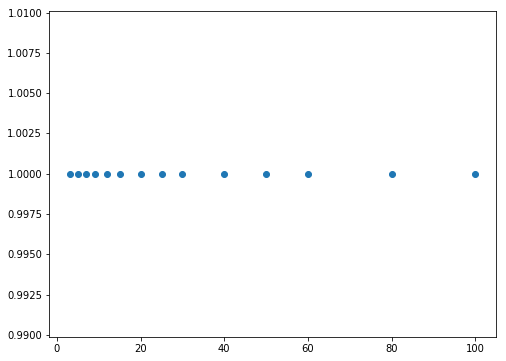

# find mass bins # 

In [62]:
mass_list=[3,5,7, 9, 12, 15, 20, 25, 30,40, 50, 60, 80, 100 ] # list of model masses


###################################3
#make bins from mass list############
####################################

#duplicate list with a shift 
ml2=[0]+ mass_list# mass_list.insert(0,0)
print mass_list, ml2

bins=[]

for u,v in zip(mass_list, ml2):
    
    bins += [0.5*(u-v) + v]
    
print bins




[3, 5, 7, 9, 12, 15, 20, 25, 30, 40, 50, 60, 80, 100] [0, 3, 5, 7, 9, 12, 15, 20, 25, 30, 40, 50, 60, 80, 100]
[1.5, 4.0, 6.0, 8.0, 10.5, 13.5, 17.5, 22.5, 27.5, 35.0, 45.0, 55.0, 70.0, 90.0]


# define IMF #

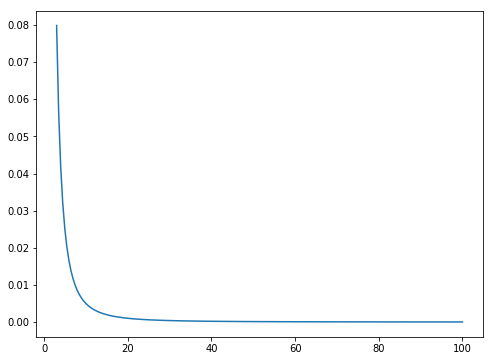

In [4]:
def imf(m,alpha, eta0):
    """power law imf with power -alpha, constant eta0.
    m is input masses"""
    return eta0 * m**(-alpha)


def CDF_imf(lower, upper, alpha, eta0):
    """Cumlative distribution function from power law imf with power -alpha, constant eta0.
    m is input masses. integral of imf"""
    a= -alpha +1
    
    if lower == 0 :
        
        return -(eta0 /a * upper**a)
    
    
    else:
        int_upper=  (eta0/ a) * upper**a
        int_lower= (eta0/ a) *lower**a
        integ_result= int_upper - int_lower
    
        return integ_result
    

In [60]:

#check that total CDF between mass limits is 1. If not eta0 value needs to be tweaked! 
print CDF_imf(1.5, 90, 2.3, 2.21306)

1.00001550797


# calculate mass distribution #

In [72]:
#duplicate list with a shift 
b2 = list(bins)
b2.pop(0)

mass_dist={}

#print "m1, m2, p(m1 < m < m2):"
for b,a, m  in zip(bins, b2, mass_list): 
    #print b,a,CDF_imf(b, a, 2.3, 2.21306)
    mass_dist[m] = CDF_imf(b, a, 2.3, 2.21306)
    
    
print mass_dist

{3: 0.7241356577037639, 5: 0.11503379539964692, 7: 0.05171627070754321, 40: 0.0046656057007761435, 9: 0.033957350941464404, 12: 0.02231774966320519, 15: 0.016539226856327777, 80: 0.0018948247054543675, 50: 0.0027725797408426536, 20: 0.01148806878676148, 25: 0.006826892116983455, 60: 0.002503397630341639, 30: 0.006164088013952022}


## plot mass distribution ##

[0.7241356577037639, 0.11503379539964692, 0.05171627070754321, 0.0046656057007761435, 0.033957350941464404, 0.02231774966320519, 0.016539226856327777, 0.0018948247054543675, 0.0027725797408426536, 0.01148806878676148, 0.006826892116983455, 0.002503397630341639, 0.006164088013952022]
1.5 4.0 0.724135657704
4.0 6.0 0.1150337954
6.0 8.0 0.0517162707075
8.0 10.5 0.0339573509415
10.5 13.5 0.0223177496632
13.5 17.5 0.0165392268563
17.5 22.5 0.0114880687868
22.5 27.5 0.00682689211698
27.5 35.0 0.00616408801395
35.0 45.0 0.00466560570078
45.0 55.0 0.00277257974084
55.0 70.0 0.00250339763034
70.0 90.0 0.00189482470545


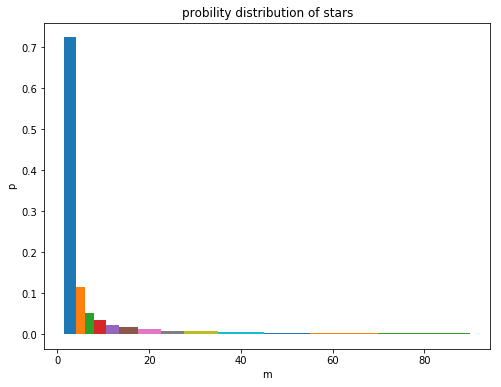

In [6]:
print star_dist.values()

for b,a, m  in zip(bins, b2, mass_list): 
    p=CDF_imf(b, a, 2.3, 2.21306)
    print b,a,p
    x=[b,a,a,b]
    y=[0,0, p,p]
    
    plt.fill(x,y)
    
    

plt.title ("probility distribution of stars")
plt.ylabel("p")
plt.xlabel("m")
plt.show()

# rotation distribution #

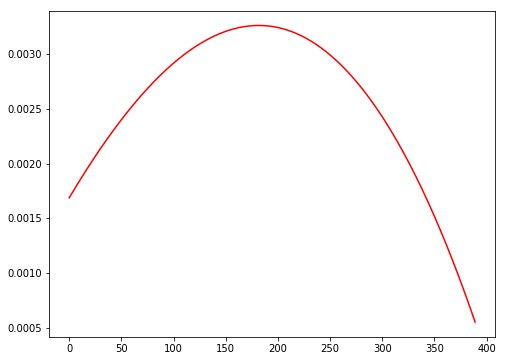

In [65]:
# load in  rot distributoon

v_dist=pd.read_pickle('./v_dist.pk')
plt.plot(v_dist[v_dist.columns[1]], v_dist[v_dist.columns[0]])

plt.show()


# define rotation bins # 

In [12]:
rot_values=[0,50,100,150,200,250,300,350,400,420,450,480,500]

In [66]:
#duplicate list with a shift 
rl2=[0]+ rot_values# mass_list.insert(0,0)
print rot_values, rl2

rot_bins=[]

for u,v in zip(rot_values, rl2):
    
    rot_bins += [0.5*(u-v) + v]
    
print rot_bins


[0, 50, 100, 150, 200, 250, 300, 350, 400, 420, 450, 480, 500] [0, 0, 50, 100, 150, 200, 250, 300, 350, 400, 420, 450, 480, 500]
[0.0, 25.0, 75.0, 125.0, 175.0, 225.0, 275.0, 325.0, 375.0, 410.0, 435.0, 465.0, 490.0]


# calculate discretized distribution of rotations # 

In [67]:
print (integrate.cumtrapz(x=v_dist['v'], y=v_dist['pdf'], initial=0 )).max()

0.988616146624


In [68]:
#duplicate list with a shift 
r2 = list(rot_bins)
r2.pop(0)

rot_dist={}

#print "r1, r2, p(r1 < r < r2):"
for b,a, m  in zip(rot_bins, r2, rot_values): 
    x=v_dist.loc[ (v_dist['v'] < a) & (v_dist['v'] >b), 'v' ]
    y=v_dist.loc[ (v_dist['v'] < a) & (v_dist['v'] >b), 'pdf' ]
    
    #print len(x), len(y)
    if len(x) != 0 and len(y) != 0:
        #print b,a,(integrate.cumtrapz(x=x, y=y, initial=0 )).max()    #(integral of vCDF) #CDF_imf(b, a, 2.3, 2.21306)
        rot_dist[m] = (integrate.cumtrapz(x=x, y=y, initial=0 )).max()
    
    
print rot_dist

{0: 0.04408942863399213, 100: 0.1445443029955974, 200: 0.15749265010643224, 300: 0.11748060896971094, 400: 0.010092413890637541, 50: 0.11648776812770271, 150: 0.15586319056510842, 250: 0.1480877677043819, 350: 0.073376608561421142}


# plot discretized rotation distribution #

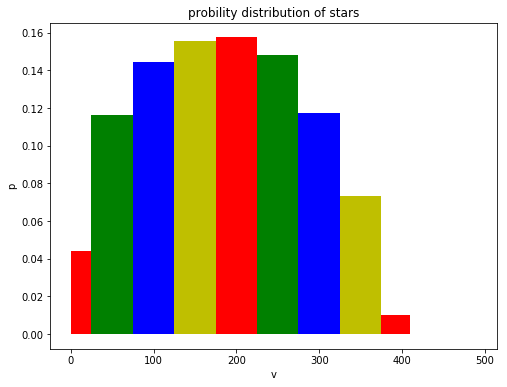

In [59]:
#print rot_dist.values()

for b,a, m  in zip(rot_bins, r2, rot_values): 
    
    if m in rot_dist:
        p=rot_dist[m]
        
    else:
        p=0
        
    #print b,a,p
    x=[b,a,a,b]
    y=[0,0, p,p]
    plt.fill(x,y)

plt.title ("probility distribution of rotation")
plt.ylabel("p")
plt.xlabel("v")
plt.show()

# combine mass and rotation distributions to get stars of each mass and rotation# 

In [227]:
tot_dist={}
su=0
for m, mp in mass_dist.items():
    #print 'mass', m, mp
    for r, rp in rot_dist.items():
        #print 'mass', m, 'rot', r, 'proportion', mp*rp
        su+= mp*rp
        tot_dist[m,r]= mp*rp
        
#print tot_dist

 
# pickle so that distribution can be visualized in separate notebook 
pickle.dump( tot_dist, open( "total_distribution.p", "wb" ) )

# visualize whole distribution # 

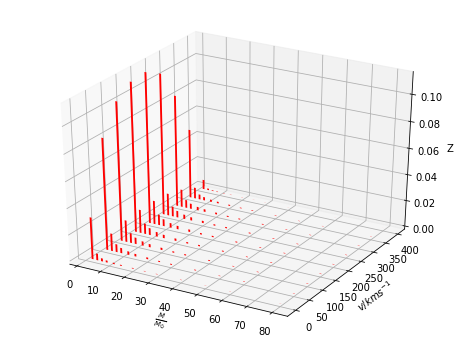

In [224]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for mass_key in mass_list:
    for key in tot_dist.keys():
        if key[0] == mass_key: 
            m=  [mass_key]
            v=  [key[1]]
            z=tot_dist[mass_key, key[1]]
            ax.bar(left=m, height=z, zs=v, zdir='y', color='r', alpha=1)


ax.set_xlabel(r'$\frac{M}{M_{\odot}}$')
ax.set_ylabel(r'$v/kms^{-1}$')
ax.set_zlabel('fraction of population')

plt.show()

# TESTING#

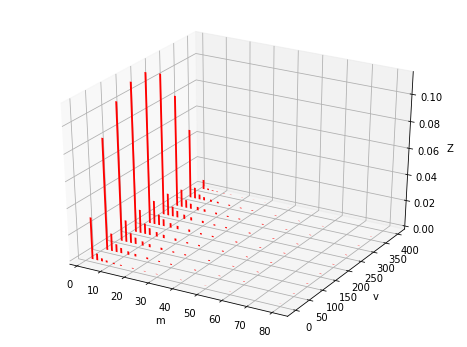

Traceback (most recent call last):
  File "/home/ben/.local/lib/python2.7/site-packages/matplotlib/backends/backend_qt5agg.py", line 197, in __draw_idle_agg
    FigureCanvasAgg.draw(self)
  File "/home/ben/.local/lib/python2.7/site-packages/matplotlib/backends/backend_agg.py", line 464, in draw
    self.figure.draw(self.renderer)
  File "/home/ben/.local/lib/python2.7/site-packages/matplotlib/artist.py", line 63, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/home/ben/.local/lib/python2.7/site-packages/matplotlib/figure.py", line 1143, in draw
    renderer, self, dsu, self.suppressComposite)
  File "/home/ben/.local/lib/python2.7/site-packages/matplotlib/image.py", line 139, in _draw_list_compositing_images
    a.draw(renderer)
  File "/home/ben/.local/lib/python2.7/site-packages/mpl_toolkits/mplot3d/axes3d.py", line 278, in draw
    for patch in self.patches]
AttributeError: 'Rectangle' object has no attribute 'do_3d_projection'


In [217]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for mass_key in mass_list:
    for key in tot_dist.keys():
        if key[0] == mass_key: 
            m=  [mass_key]
            v=  [key[1]]
            z=tot_dist[mass_key, key[1]]



            ax.bar(left=m, height=z, zs=v, zdir='y', color='r', alpha=1)




ax.set_xlabel('m')
ax.set_ylabel('v')
ax.set_zlabel('Z')

plt.show()

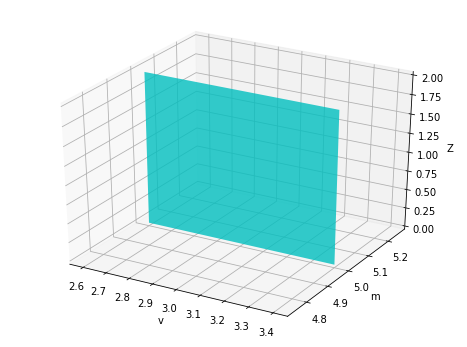

In [184]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x=[5]
y=[3]
z=[2]

ax.bar(y, z, zs=x, zdir='y', color=cs, alpha=0.8)




ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [159]:
print len(rot_values)

13


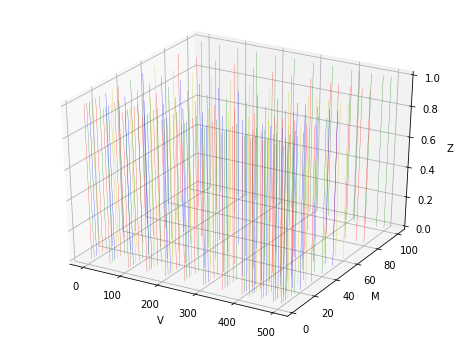

In [162]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for  z in ( mass_list):
    
    u=[]
    for key in tot_dist.keys():
        if key[0] == z: 
            #print tot_dist[mass_key, key[1]]
            u.append(tot_dist[mass_key, key[1]])
    
    
    
    xs = rot_values
    ys = np.ones(len(rot_values))

   
    ax.bar(xs, ys, zs=z, zdir='y', alpha=0.8)

ax.set_xlabel('V')
ax.set_ylabel('M')
ax.set_zlabel('Z')

plt.show()

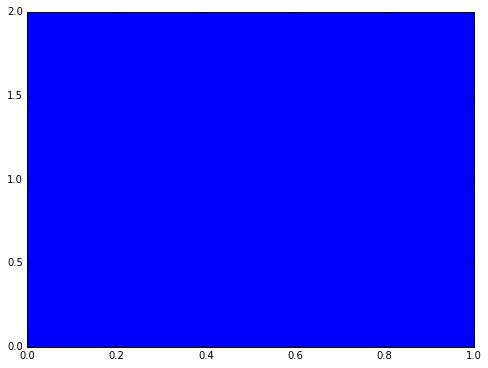

In [148]:



x = [0, 0, 1, 1]
y = [0, 2, 2, 0]
plt.fill(x,y)
plt.show()

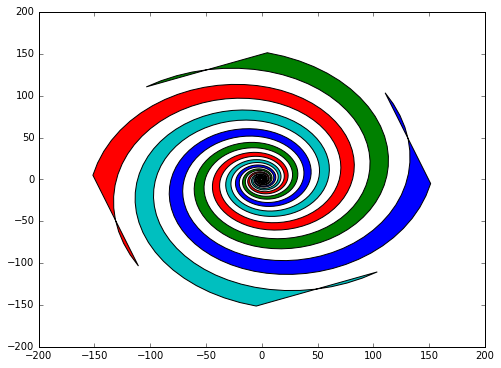

In [137]:
theta = np.arange(0, 8*np.pi, 0.1)
a = 1
b = .2

for dt in np.arange(0, 2*np.pi, np.pi/2.0):

    x = a*np.cos(theta + dt)*np.exp(b*theta)
    y = a*np.sin(theta + dt)*np.exp(b*theta)

    dt = dt + np.pi/4.0

    x2 = a*np.cos(theta + dt)*np.exp(b*theta)
    y2 = a*np.sin(theta + dt)*np.exp(b*theta)

    xf = np.concatenate((x, x2[::-1]))
    yf = np.concatenate((y, y2[::-1]))

    p1 = plt.fill(xf, yf)

plt.show()